In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Data
raw_data=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [ ]:
data=raw_data.copy()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# The id column is not relevant
data.drop(columns=['id'],inplace=True) 
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### Descriptive Analytics

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##### Observations : 
1) BMI contains missing values.

2) The average age is 43.

3) The average bmi is 28 (will change after imputation).

4) The minimum age is questionable.

5) Average glucose level is 106 (can be useful later).

#### Handling Missing Values

In [ ]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(data)

,Total,Percent
bmi,201,0.039335
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


In [ ]:
# Imputing the missing values with the mean
data=data.fillna(np.mean(data['bmi']))


In [ ]:
# Classifying data into numerical and categorical variables.
data_numerical=data[['age','avg_glucose_level','bmi']]
data_categorical=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

#### Numerical Variable analysis


Text(0.5, 1.0, 'Kde Plots for age, avg_glucose_level and bmi')

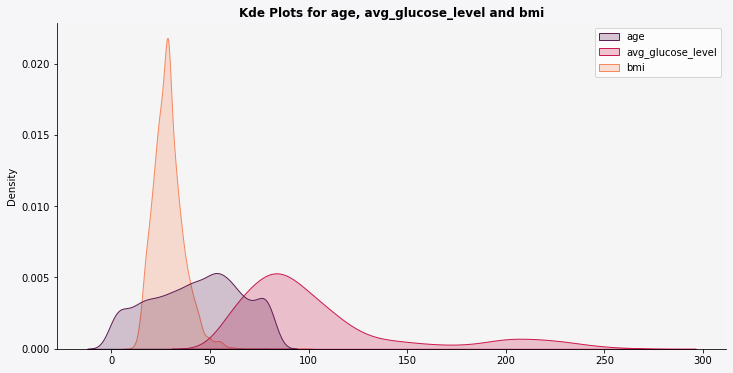

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(data=data_numerical,shade=True,palette='rocket') # Distributions
# removing spines
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for age, avg_glucose_level and bmi',weight='bold')

#### Observations :
1) The avg_glucose_level is heavily skewed towards right and most of the distribution is between 50-150.

2) The bmi is between 0 and 50 for most of the people.

3) The age is distributed between 0 and 100 almost evenly.

4) The data is not normally distributed (have to normalize or standardize).

In [ ]:
# Skewness and kurtosis
s_k=[]
for i in data_numerical.columns:
    s_k.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,age,-0.137059,-0.991010
1,avg_glucose_level,1.572284,1.680479
2,bmi,1.076716,3.623061


As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

#### Analysis with Stroke

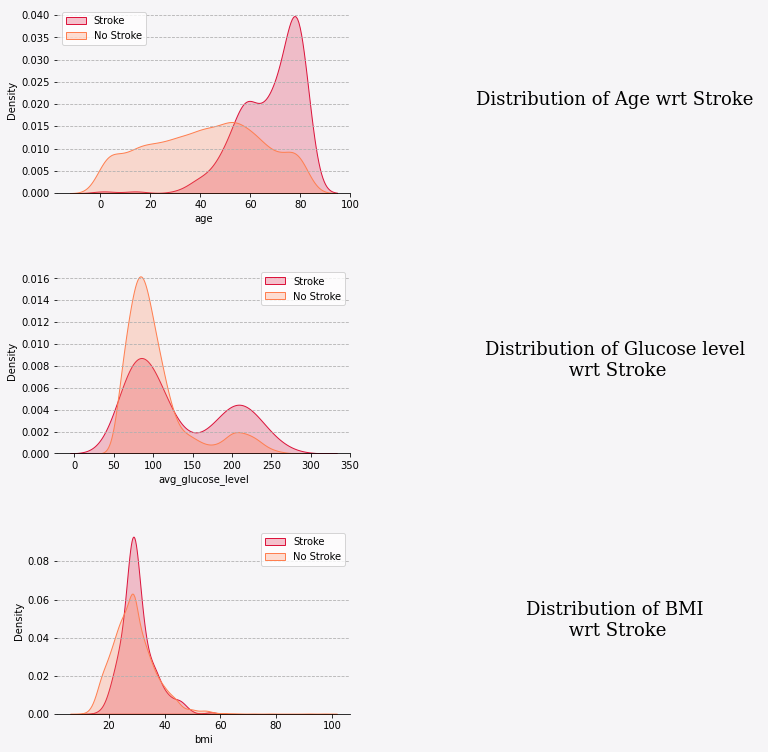

In [ ]:
fig = plt.figure(figsize=(20,13))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
sns.kdeplot(ax=ax0,x=data.loc[data['stroke']==1]['age'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax0,x=data.loc[data['stroke']==0]['age'],color='coral',label='No Stroke',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')

ax1.text(0.5,0.5,'Distribution of Age wrt Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')

sns.kdeplot(ax=ax2,x=data.loc[data['stroke']==1]['avg_glucose_level'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax2,x=data.loc[data['stroke']==0]['avg_glucose_level'],color='coral',label='No Stroke',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')

ax3.text(0.5,0.5,'Distribution of Glucose level\n wrt Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')


sns.kdeplot(ax=ax4,x=data.loc[data['stroke']==1]['bmi'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax4,x=data.loc[data['stroke']==0]['bmi'],color='coral',label='No Stroke',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')

ax5.text(0.5,0.5,'Distribution of BMI\n wrt Stroke',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')
# removing labels

axes1=[ax1,ax3,ax5]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

#### Bivariate analysis of Numerical Variables


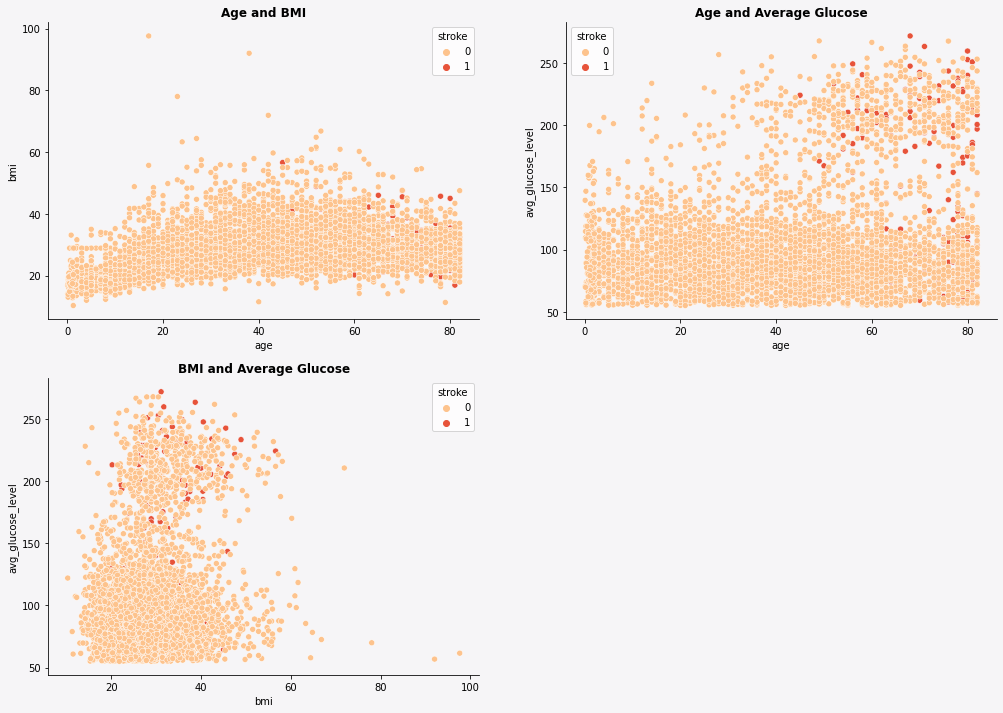

In [ ]:
fig = plt.figure(figsize=(17,12))
gs = fig.add_gridspec(2,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[1,0])
axes=[ax0,ax1,ax2]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
# Age and bmi
sns.scatterplot(ax=ax0,x=data_numerical['age'],y=data_numerical['bmi'],hue=data_categorical['stroke'],palette="OrRd")
ax0.set_title('Age and BMI',fontweight='bold')
# Age and Glucose
sns.scatterplot(ax=ax1,x=data_numerical['age'],y=data_numerical['avg_glucose_level'],hue=data_categorical['stroke'],palette="OrRd")
ax1.set_title('Age and Average Glucose',fontweight='bold')
# BMI and Glucose
sns.scatterplot(ax=ax2,x=data_numerical['bmi'],y=data_numerical['avg_glucose_level'],hue=data_categorical['stroke'],palette="OrRd")
ax2.set_title('BMI and Average Glucose',fontweight='bold')
#removing spines
for i in ["top","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)

#### Observations :
1) The data appears to be highly imbalanced ( only few points where stroke = 1)

2) There are few outliers in Bmi & Age and BMI & Avg Glucose levels (keeping them as they are only few). 

3) The Age group is heavily distributed between 0 and 60 (no particular range has significantly more people than others).

4) Age and Avg glucose levels can be split into 2 clusters ( one less than 150 and other more than that). Only few cases of people with glucose levels less than 150 experienced stroke.

5) BMI and Glucose levels confirm that people with less than 150 glucose levels are less prone to strokes than people with glucose levels more than 150 level. BMI >40 have low avg glucose

#### Correlation plot for numerical variables


Text(-1.7, 1.1, 'Heatmap of Numerical Variables')

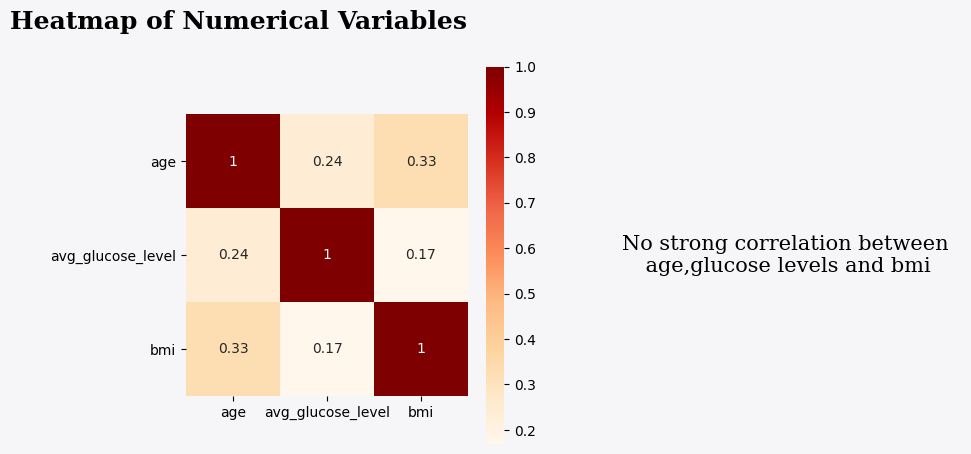

In [ ]:
fig=plt.figure(figsize=(10,5),dpi=100)
gs=fig.add_gridspec(1,2)
# adding subplots
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
# changing background color of our plots
for i in axes:
    i.set_facecolor(background_color)
# changing the figure background color
fig.patch.set_facecolor(background_color) 
# heatmap of numerical data
corrmat = data_numerical.corr()
sns.heatmap(ax=ax0,data=corrmat,annot=True, cmap="OrRd",square=True)
ax1.text(0.5,0.5,'No strong correlation between\n age,glucose levels and bmi',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
plt.text(-1.7,1.1,'Heatmap of Numerical Variables',fontsize=18,fontweight='bold',fontfamily='serif')    

As there is no strong correlation between the variables, we can ignore the chances of multicollinearity.

#### Pairplot

<Figure size 2000x1500 with 0 Axes>

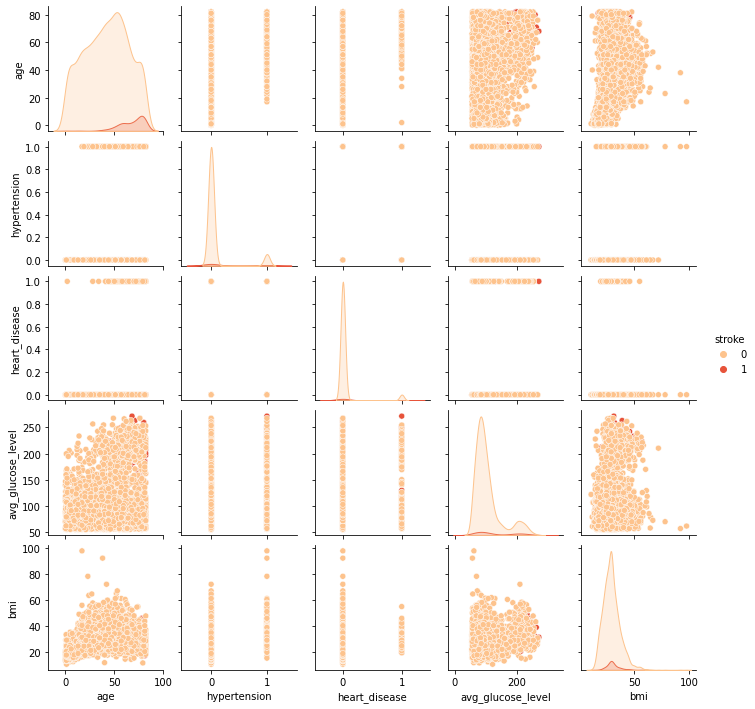

In [ ]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data=data,hue='stroke',size=2,palette='OrRd')
plt.show()

#### Univariate Analysis of Categorical Variables

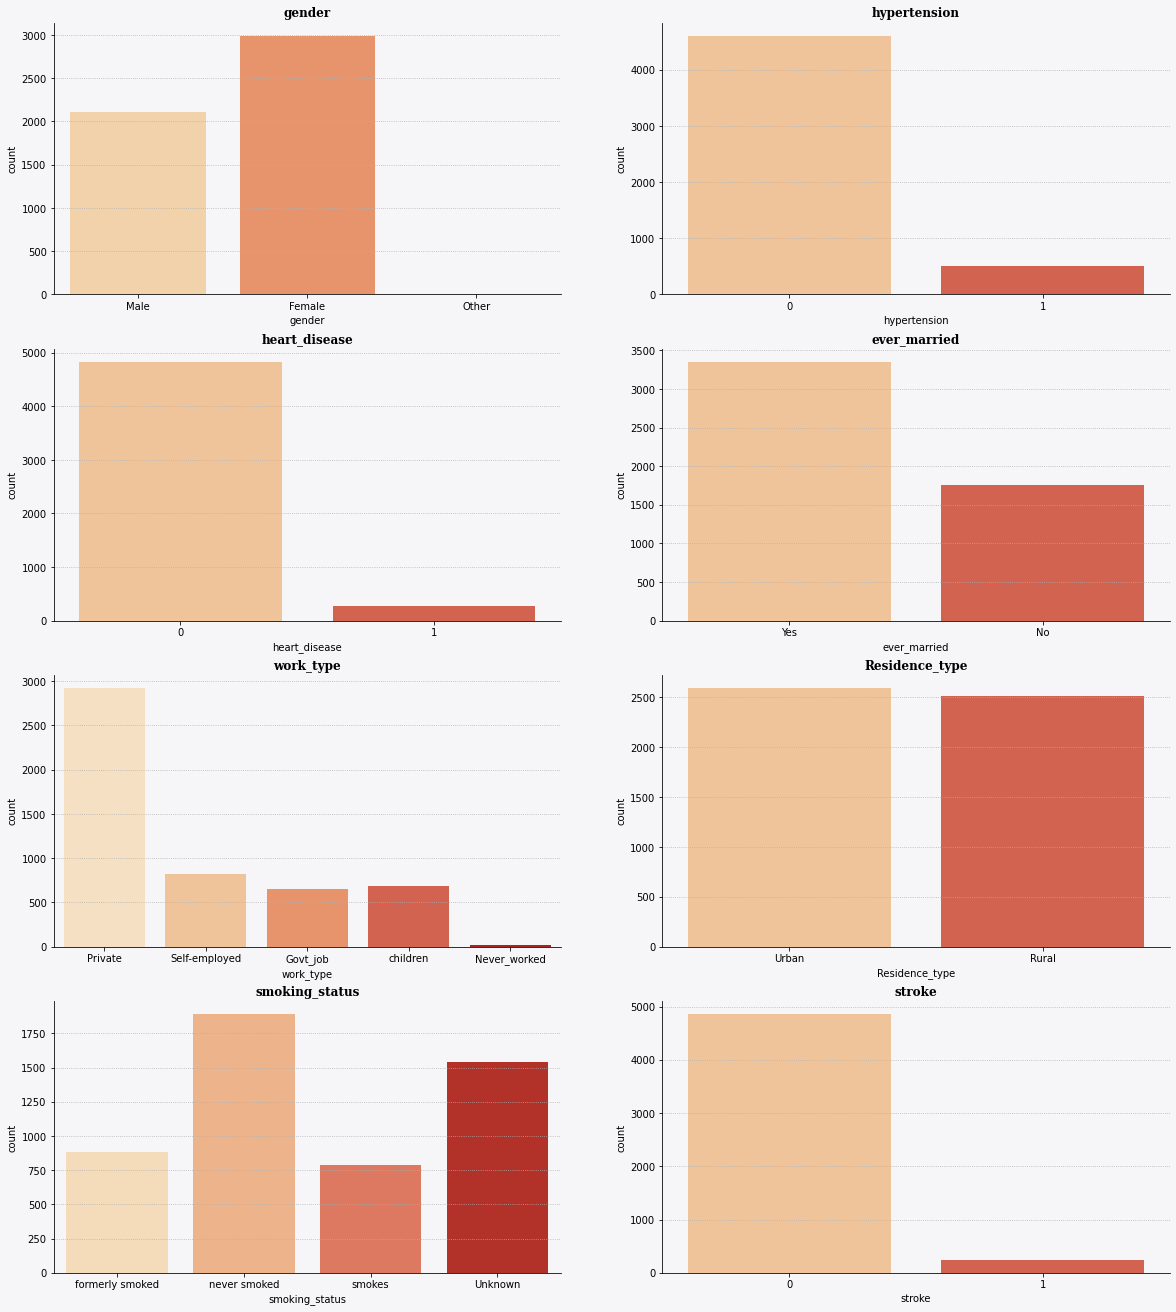

In [ ]:
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_categorical.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_categorical[val],palette='OrRd')

#### Observations :
1) Females are more than male in our data. The Other category in gender is not visible as it contains only one value.

2) The number of people without hypertension are way less than people who has it.

3) The number of people with heart disease is extremely low.
 
4) The number of people who are married are way more than unmarried people(makes sense as the distribution is between 0 and 60)

5) People seem to prefer working in private companies while the number of self-emplyed/ govt_job and children seems to be equal in number (children can be ignored). Unemployed people are extremely less.

6) Not a big difference between the population in urban and rural area.

7) The Unknown category reprsents that we do not know if a person smoked or not. If the size of unknown is too large then we will remove it from our model. Non-smokers are way more than people who smoked/used to smoke which is a good thing.

8) Number of people with strokes are less than 1000 in number.

#### Analysing Categorical Variables with Stroke


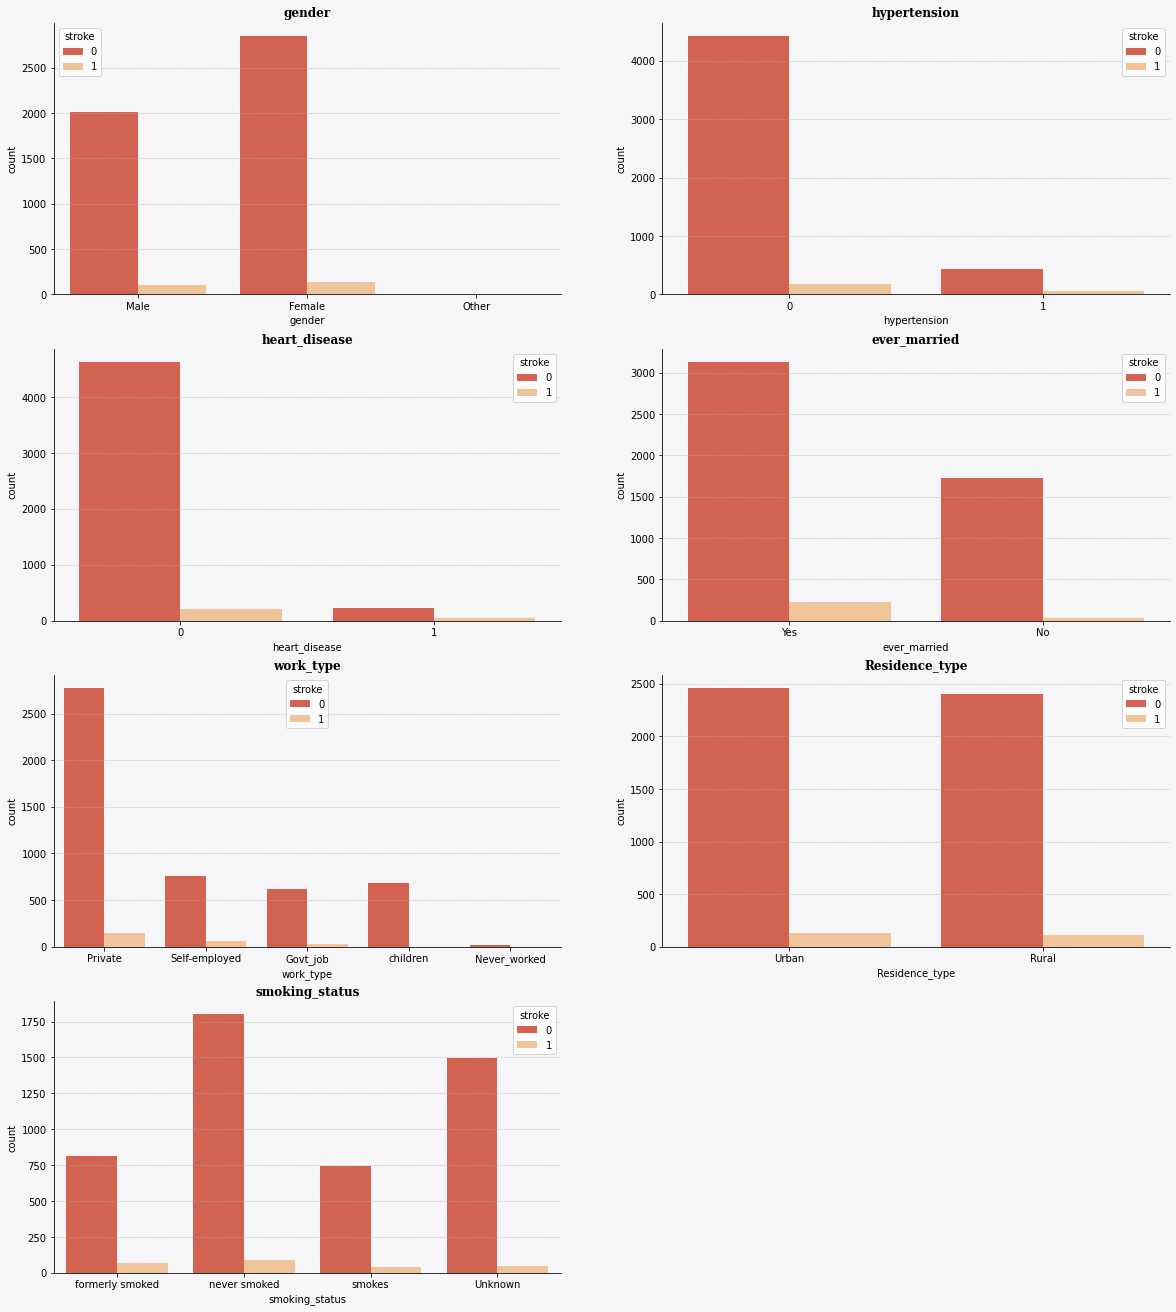

In [ ]:
data_cat=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status']]
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(data_cat[val],palette='OrRd_r',hue=data['stroke'])

#### Observations :
1) Seems that number of male and female who has stroke are equal in number.

2) The number of people who do not have hypertension also shows signs of no stroke. And people with hypertension also do not show signs of more people with stroke (may be due to the fact that our data has so many negative(0) variables).

3) The people with heart diesease show signs of stroke too(as expected).

4) The people who got married show signs of stroke way more than people who are unmarried ( expected i guess).

5) Private employees seems to experience stroke more than other work_types(may be due to work pressure). Self-employed people do show signs of stroke(may be due to reasons like heart disease,tension etc). Children can be ignored.

6) Almost no difference between people living in urban and rural areas in terms of stroke occurence.

7) People who formerly smoked and who smoke (combined) are showing signs of stroke way more than people who never smoked (considering the sample size of people who never smoked and people who used to smoke and smoke now).


#### Looking closely at stroke and some of the variables

The observations for below graphs are the same as the figures above. 

Text(-0.7, 100, 'Smoking Status and Stroke')

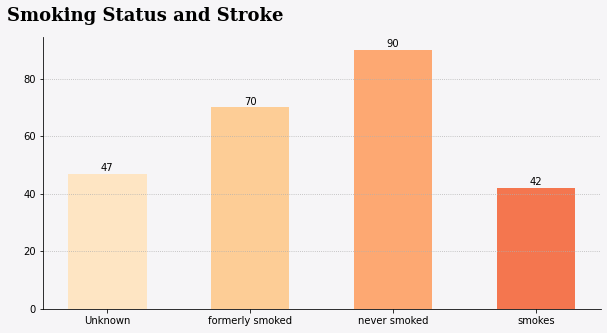

In [ ]:
# Smoking Type and Stroke
pd_stroke = pd.pivot_table(data=data[data['stroke']==1],index=data['smoking_status'],values='stroke',aggfunc='count').reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,5))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.bar(pd_stroke['smoking_status'],pd_stroke['stroke'],width=0.55,linewidth=0.7,color=sns.color_palette('OrRd'))
for an in pd_stroke.index:
    ax.annotate(pd_stroke['stroke'][an],xy=(pd_stroke['smoking_status'][an],pd_stroke['stroke'][an]+2),va='center',ha='center')
ax.grid(linestyle=':',axis='y')
for i in ['top','right']:
    ax.spines[i].set_visible(False)
plt.text(-0.7,100,'Smoking Status and Stroke',fontsize=18,fontweight='bold',fontfamily='serif')

Text(-0.7, 250, 'Marrital Status and Stroke')

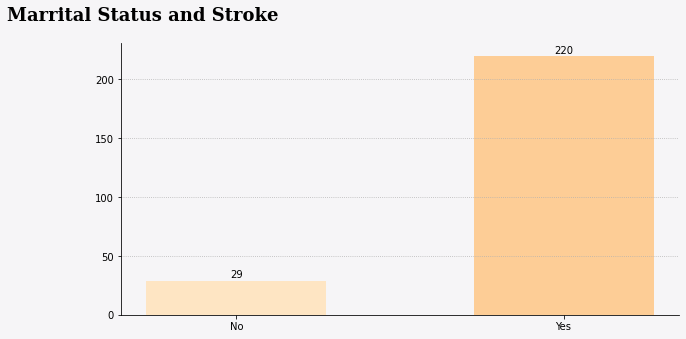

In [ ]:
# Marrital Status and Stroke
pd_stroke = pd.pivot_table(data=data[data['stroke']==1],index=data['ever_married'],values='stroke',aggfunc='count').reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,5))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.bar(pd_stroke['ever_married'],pd_stroke['stroke'],width=0.55,linewidth=0.7,color=sns.color_palette('OrRd'))
for an in pd_stroke.index:
    ax.annotate(pd_stroke['stroke'][an],xy=(pd_stroke['ever_married'][an],pd_stroke['stroke'][an]+5),va='center',ha='center')
ax.grid(linestyle=':',axis='y')
for i in ['top','right']:
    ax.spines[i].set_visible(False)
plt.text(-0.7,250,'Marrital Status and Stroke',fontsize=18,fontweight='bold',fontfamily='serif')

Text(-0.7, 170, 'Work Type and Stroke')

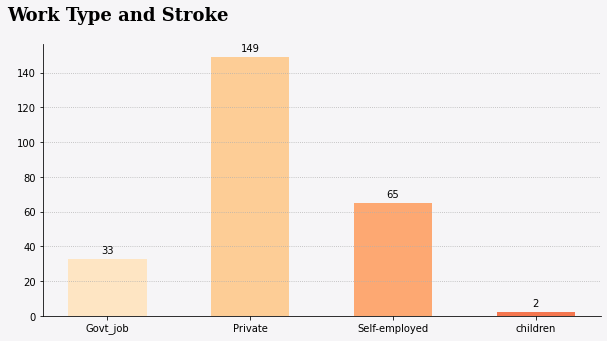

In [ ]:
# Work Type and Stroke
pd_stroke = pd.pivot_table(data=data[data['stroke']==1],index=data['work_type'],values='stroke',aggfunc='count').reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,5))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.bar(pd_stroke['work_type'],pd_stroke['stroke'],width=0.55,linewidth=0.7,color=sns.color_palette('OrRd'))
for an in pd_stroke.index:
    ax.annotate(pd_stroke['stroke'][an],xy=(pd_stroke['work_type'][an],pd_stroke['stroke'][an]+5),va='center',ha='center')
ax.grid(linestyle=':',axis='y')
for i in ['top','right']:
    ax.spines[i].set_visible(False)
plt.text(-0.7,170,'Work Type and Stroke',fontsize=18,fontweight='bold',fontfamily='serif')


Text(-0.7, 210, 'Hypertension and Stroke')

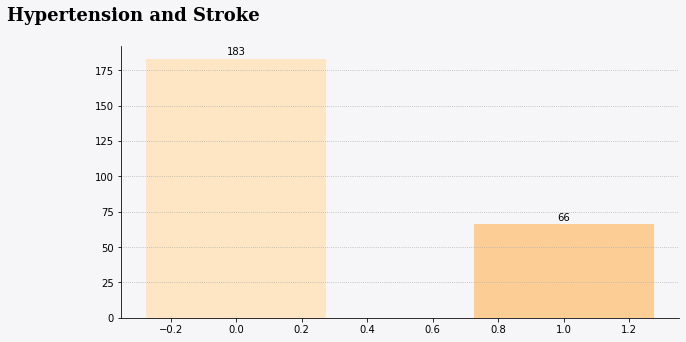

In [ ]:
# Hypertension and Stroke
pd_stroke = pd.pivot_table(data=data[data['stroke']==1],index=data['hypertension'],values='stroke',aggfunc='count').reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,5))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.bar(pd_stroke['hypertension'],pd_stroke['stroke'],width=0.55,linewidth=0.7,color=sns.color_palette('OrRd'))
for an in pd_stroke.index:
    ax.annotate(pd_stroke['stroke'][an],xy=(pd_stroke['hypertension'][an],pd_stroke['stroke'][an]+5),va='center',ha='center')
ax.grid(linestyle=':',axis='y')
for i in ['top','right']:
    ax.spines[i].set_visible(False)
plt.text(-0.7,210,'Hypertension and Stroke',fontsize=18,fontweight='bold',fontfamily='serif')

Text(-0.7, 220, 'Heart Disease and Stroke')

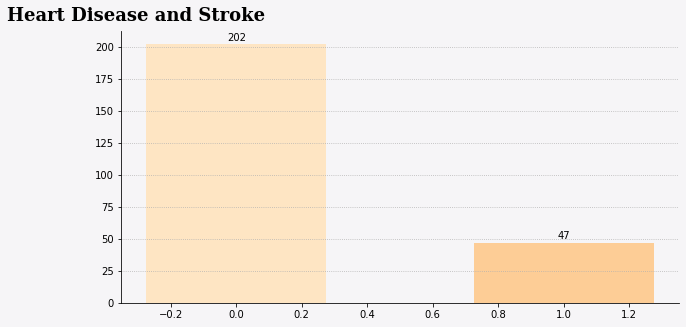

In [ ]:
# Heart Disease and Stroke
pd_stroke = pd.pivot_table(data=data[data['stroke']==1],index=data['heart_disease'],values='stroke',aggfunc='count').reset_index()
fig,ax=plt.subplots(1,1,figsize=(10,5))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.bar(pd_stroke['heart_disease'],pd_stroke['stroke'],width=0.55,linewidth=0.7,color=sns.color_palette('OrRd'))
for an in pd_stroke.index:
    ax.annotate(pd_stroke['stroke'][an],xy=(pd_stroke['heart_disease'][an],pd_stroke['stroke'][an]+5),va='center',ha='center')
ax.grid(linestyle=':',axis='y')
for i in ['top','right']:
    ax.spines[i].set_visible(False)
plt.text(-0.7,220,'Heart Disease and Stroke',fontsize=18,fontweight='bold',fontfamily='serif')

#### Correlation Matrix 

Text(-1.7, 1.1, 'Heatmap of Data')

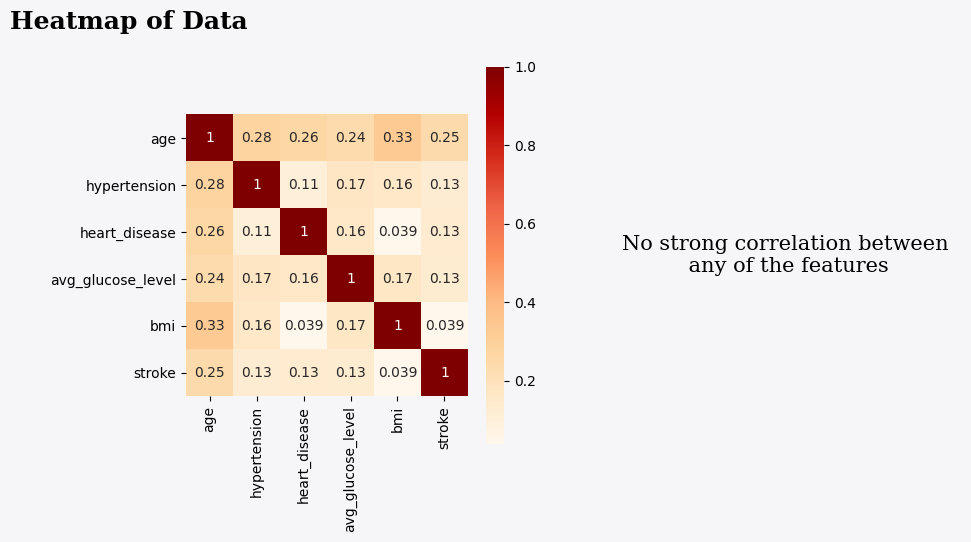

In [ ]:
fig=plt.figure(figsize=(10,5),dpi=100)
gs=fig.add_gridspec(1,2)
# adding subplots
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
axes=[ax0,ax1]
background_color = '#f6f5f7'
# changing background color of our plots
for i in axes:
    i.set_facecolor(background_color)
# changing the figure background color
fig.patch.set_facecolor(background_color) 
# heatmap of numerical data
corrmat = data.corr()
sns.heatmap(ax=ax0,data=corrmat,annot=True, cmap="OrRd",square=True)
ax1.text(0.5,0.5,'No strong correlation between\n any of the features',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 15,fontfamily='serif')
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False, bottom=False)
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
plt.text(-1.7,1.1,'Heatmap of Data',fontsize=18,fontweight='bold',fontfamily='serif')    

#### Observations:
1) No strong correlation between our features.

2) The highest correlation can be observed between body mass index(bmi) and age.

3) The weakest correlation can be observed between heart_disease and hyper_tension (questionable).

### Data Preprocessing

In [ ]:
# Convert Marrital Status, Residence and Gender into 0's and 1's
data['gender']=data['gender'].apply(lambda x : 1 if x=='Male' else 0) 
data["Residence_type"] = data["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
# Removing the observations that have smoking type unknown. 
data=data[data['smoking_status']!='Unknown']

In [ ]:
# One Hot encoding smoking_status, work_type
data_dummies = data[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies)
data.drop(columns=['smoking_status','work_type'],inplace=True)


In [ ]:
data_stroke=data['stroke']
data.drop(columns=['stroke'],inplace=True)
data=data.merge(data_dummies,left_index=True, right_index=True,how='left')

### Splitting the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,data_stroke,test_size=0.25,random_state=0)

In [ ]:
# Standardizing our training and testing data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

We perform feature scaling after splitting the data into training and testing sets in order to avoid data leakage.

### Training the Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#https://towardsdatascience.com/model-evaluation-techniques-for-classification-models-eac30092c38b
def Model(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    plot_confusion_matrix(model,x_test,y_test,cmap="OrRd")
    metrics.plot_roc_curve(model, x_test, y_test)  

Testing Score 
 0.945067264573991


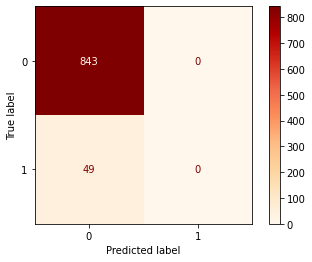

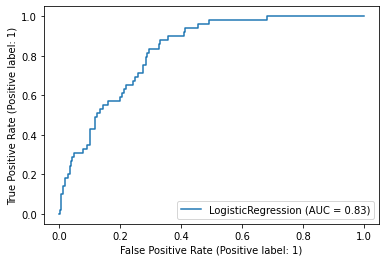

In [ ]:
# Logistic Regression
lg_reg=LogisticRegression()
Model(lg_reg)

Testing Score 
 0.9069506726457399


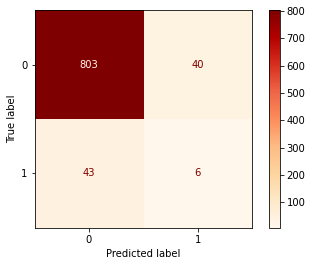

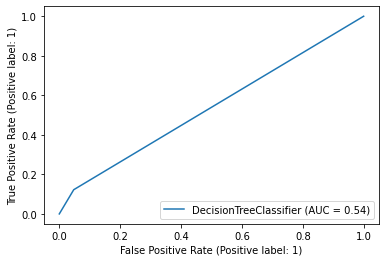

In [ ]:
# Decision Tree Classification
d_classif= DecisionTreeClassifier()
Model(d_classif)

#### The confusion matrix interpretation:
1) The first element is True Negative([0,0]) - They are classified as 0 and our model correctly classified them as 0.

2) The second element is False Positive([0,1]) - Their actual value is 0 but our model predicted them as 1.

3) The third element is False Negative([1,0]) - Their actual value is 1 but our model predicted them as 0.

4) The Fourth element is True Positive([1,1]) - Their actual value is 1 and our model predicted them as 1.

